In [2]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from IPython.display import display, Math
import matplotlib.pyplot as plt

init_vprinting()

# Case 2
Double link + reaction wheel

In [6]:
# Environment
g, t = sp.symbols('g,t')

# Thetas
theta_1, theta_2, theta_w = dynamicsymbols("theta_1,theta_2,theta_w")
theta_1d, theta_2d, theta_wd = sp.diff(sp.Matrix([theta_1, theta_2, theta_w]), t)
theta_1dd, theta_2dd, theta_wdd = sp.diff(sp.Matrix([theta_1d, theta_2d, theta_wd]), t)

# Masses
m1, m2, mw = sp.symbols('m1,m2,mw')

# Lengths
l_c1, l_c2 = sp.symbols("l_c1, l_c2")
l_1, l_2 = sp.symbols("l_1,l_2")
r = sp.symbols("r")

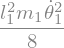

In [14]:
def get_velocity_squared(x, y):
    return sp.simplify(x.diff(t)**2 + y.diff(t)**2)

x_1 = sp.Rational(1,2) * l_1 * sp.cos(theta_1)
y_1 = sp.Rational(1,2) * l_1 * sp.sin(theta_1)
v1_squared = get_velocity_squared(x_1, y_1)
T1 = sp.Rational(1,2)*m1*v1_squared

x_2 = l_1*sp.cos(theta_1) + sp.Rational(1,2) * l_2 * sp.cos(theta_2)
y_2 = l_1*sp.sin(theta_1) + sp.Rational(1,2) * l_2 * sp.sin(theta_2)

v2_squared = get_velocity_squared(x_2, y_2)
T2 = sp.Rational(1,2)*m2*v2_squared

display(sp.simplify(T1 + 1/12*m1*l_1**2))

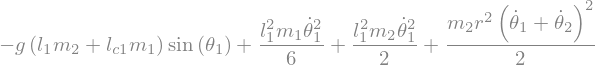

In [5]:
T =  sp.Rational(1,2) * (sp.Rational(1, 3)*m1*l_1**2*theta_1d**2 + m2*l_1**2*theta_1d**2 + m2*r**2*(theta_1d + theta_2d)**2)
V = (m1*l_c1 + m2*l_1)*g*sp.sin(theta_1)
L = T - V
display(L)

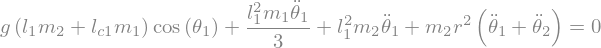

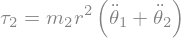

In [11]:
tau2 = sp.symbols("tau2")

eq1 = sp.simplify(sp.Equality(L.diff(theta_1d).diff(t) - L.diff(theta_1), 0))
eq2 = sp.simplify(sp.Equality(L.diff(theta_2d).diff(t) - L.diff(theta_2), tau2))

display(eq1)
display(eq2)

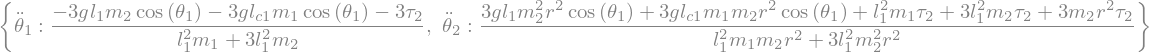

In [10]:
sp.solve([eq1, eq2], [theta_1dd, theta_2dd])

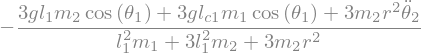

In [18]:
theta_1dd_sol = sp.solve(eq1, theta_1dd)
display(theta_1dd_sol[0])

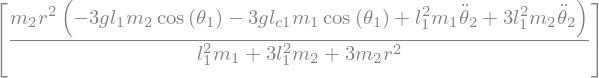

In [19]:
sp.solve(eq2.subs(theta_1dd, theta_1dd_sol[0]), tau2)